# •	Introduction
### LeNet
In 1998 Yann LeCun,Patrick Haffner, Yoshua Bengio and Leon Bottou propose an algorithim known as LeNet in their research paper https://ieeexplore.ieee.org/document/726791 . This is a type of convolution neural network as it contains convolution layers however it is standard form of neural network to solve the tasks related to images, like face and object detection estimation for pose in an image etc. LeNet is a convolution neural network with total seven layers, three of which are convolution layers and two of them are subsampling while two are fully connected layers.
Although in first layer nothing is learnt by model thats why it is commonly not considered as a layer of network but it is input layer.

### LeNet Structure
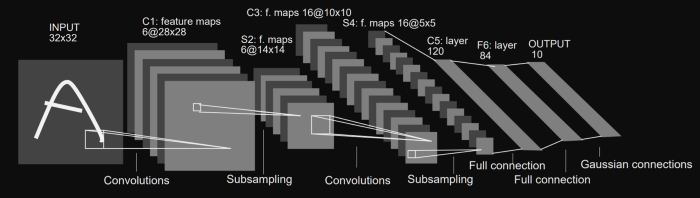

Cx is denoting convolutional layers
Sx is for subsampling layers.
x is denoting the sequential position of layer
Fx is denoting Fully connected layers.
All layers can be seen in above image, the architecture of LeNet.C1 is the first layer which is producing output of 6 feature maps. There is 5x5 kernel or filter size with stride of 1.
Fiter or Kernel is a window that consists on weights and used with input values.

 ##### Activation Function:
To introduce non linearties in neural network a methematical operation is used that transforms the signals of neurons in a scaled output. This is known as Activation function. There are different types of activation functions but we used Relu activation function in all layers. 
 ##### 'Relu(Rectified Linear Unit)' is defined as:
f(x) = max(0,x)

For the higher +ve values of z, the slope of f(z)=max(0,z) is not close to zero. 

 ##### Sofmax
Softmax is defined as 

### AlexNet
The Convolutional Neural Network (CNN) Architecture known as AlexNet topped the 2012 LSVRC competition. In the Large Scale Visual Recognition Challenge (LSVRC), research groups compete to attain greater accuracy on a variety of visual recognition challenges by evaluating their algorithms on a sizable dataset of annotated pictures (ImageNet). The way teams approached the completion after that had a significant influence on this.

### AlexNet Structure
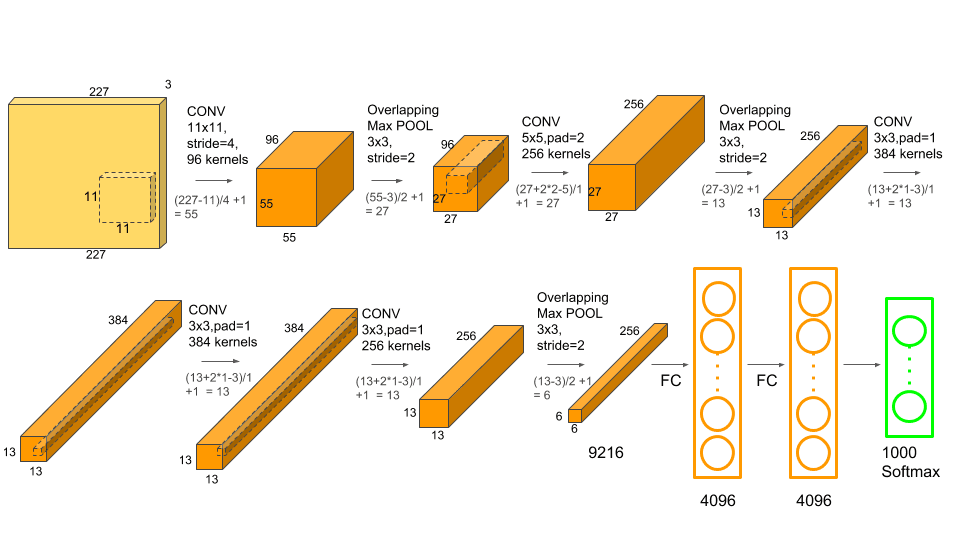

Eight weighted layers, five convolutional layers, and three fully linked layers make up the AlexNet. ReLu activation is carried out at the conclusion of each layer, with the exception of the final one, which generates a softmax spread across the thousand class labels. In first two completely linked layers, dropout is used. Max-pooling is used following the 1st, 2nd, and 5th convolutional layers, as seen in the above figure. Just those kernel mappings in the preceding layer, which are located on the same GPU, are linked to the kernels of the 2nd, 4th, and 5th convolutional layers. Every one of the kernel mappings in the 2nd layer's convolutional layer are linked to the rd3 layer's kernels. All of the neurons inside the layer below are linked to the neurons in the completely connected layers. The AlexNet makes advantage of (Rectified Linear Unit) ReLU Nonlinearity, which is a significant component.

The standard method for training neural network models used to use sigmoid activation or tanh functions.
Deep CNNs might be trained significantly more quickly utilising ReLU nonlinearity than they could using saturating activation functions such as tanh or sigmoid, according to AlexNet. 

The formula for the ReLU function is

f(x) = max (0,x) 

For larger positive values of z, the slope of the function (ReLU) is not near to zero. This hastens the convergence of the optimization. Although the slope remains 0 for negative values of z, in a neural network several neurons eventually have positive values.


# •	Selected dataset for the algorithm comparison 

  ###### The Reason we choosed this dataset.
  As LeNet is trained on MNIST digits dataset, and AlexNet has been trained on very large dataset of image net. So this CIFAR-10 is unknown for both of these algorithims, lets train on this data and compare the accuracy.
  ###### Dataset Introduction
There are 60,000 color images of 32x32 pixels with 3 channels known as CIFAR-10 dataset which has 10 different classes, and there are 6000 images for each class.Dataset is divided in two sets training and testing. There are fifty thousand images for training and ten thousands for testing. The CIFAR repository is ( https://www.cs.toronto.edu/~kriz/cifar.html ). We will classify the images using underlined dataset
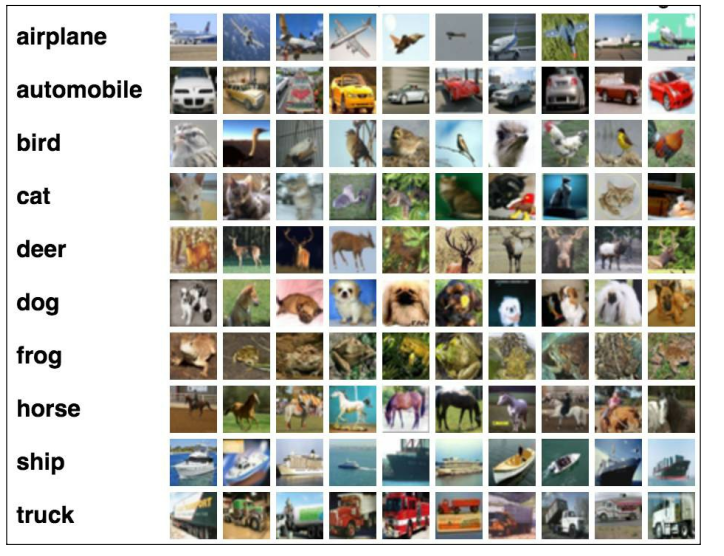

# • Implementations
To train model we have to convert images into numpy array which will be arranged in rows and columns form, to solve this issue we will use pandas and numpy liberary. To visualize images matplotlib will be used. To load data we will use keras from tensorflow backend.And to evaluate model we need metrics that are classification_report and confusion_matrix are called from sklearn liberary. 
We begin implementation by importing the libraries we will be utilizing:
Most important liberaries are as below.
Numpy: a tool to deal with n-dimensional arrays and do computations.
Keras and Tensorflow are the open source platforms used for the implementations of neural networks and machine learning models respectively.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

### Importing CIFAR-10 dataset


In [4]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

### Exploratory data analysis
To know if we have balanced dataset or not?

From the following queries we will examine how many training and testing samples in the dataset.

In [5]:
print('Numer of Training Samples:')
print(f'Number of X Traing samples are : {x_train.shape[0]} ')
print(f'Number of Y Traing samples are : {y_train.shape[0]} ')
print('=====================================================')
print('Number of Test Samples: ')
print(f'Number of X test are : {x_test.shape[0]}')
print(f'Number of Y test are : {y_test.shape[0]} ')

Numer of Training Samples:
Number of X Traing samples are : 50000 
Number of Y Traing samples are : 50000 
Number of Test Samples: 
Number of X test are : 10000
Number of Y test are : 10000 


### Image size
With the following queries we will know the size of images

In [6]:
print(f'Size of Images is : {len(x_train[1])}x{len(x_train[2])}')

Size of Images is : 32x32


As we mentioned in data introduction that image size is 32x32 and there are 3 channels . lets verify the channels with following code as well.

In [7]:
print(f'Number of color channels in training dataset are : {x_train.shape[3]} ')

print('=====================================================')

print(f'Number of color channels in test data sets are : {x_test.shape[3]}')

Number of color channels in training dataset are : 3 
Number of color channels in test data sets are : 3


From data source we know there are 10 classes lets define respectively. 

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

reshaping labeled class from 2D to 1D array so that we can print class label.

In [9]:
y_train = y_train.reshape(-1,)

To show one image by using index number of that image , creating the following function.In which we will take image from input and label from y and at lat we will match index from both X and y.

In [10]:
def plot_samples(X,y,index):
  plt.figure(figsize=(12,2)) #controlled image size 
  plt.imshow(X[index]) #to show image
  plt.xlabel(classes[y[index]])     #checking image class

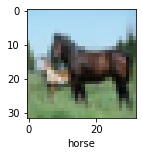

In [11]:
plot_samples(x_train,y_train,12) #function created to see image and class label as well (you can change index to see different image with label)

Let's view more images in a grid format. Defined the dimensions of the plot grid then we uses subplots from matplotlib to plot more than one images in singke frame. after that we flaten the 15 x 15 matrix into 225 array.got the length of the train dataset,Selected a random number from 0 to n_train in for loop,then Selected a random index numbers and for final step read and displayed images with the selected indexes 

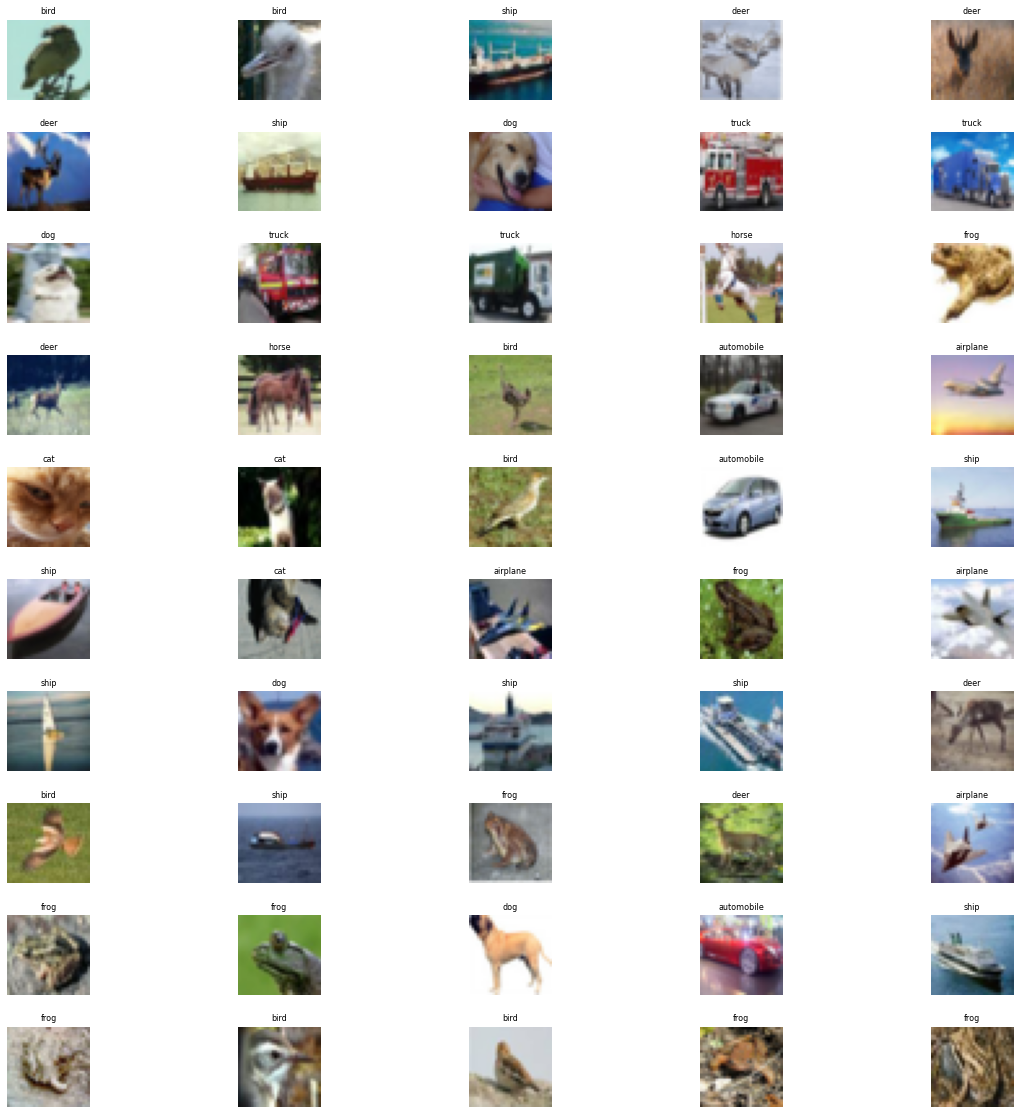

In [12]:

W_grid = 5
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# 

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20,20))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(x_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(classes[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Lets convert 2D data into 1D data and then convert the images into numpy array with following codes.

In [13]:
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

##### Data normalisation:
It is a crucial step in making sure that each input parameter—in this example, a pixel—has a comparable data distribution. This speeds up convergence while the network is being trained.

In [14]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

##### Imbalanced data:
Imbalanced data isn't necessarily a negative thing, as there is always some degree of imbalance in actual data sets. However, if the amount of imbalance is minor, your model performance should be unaffected. So we are going to check if we have a banlaced data or imbalanced data!
from the following numbers it is clear that we hav a blanced data so we can proceed it for model training.

In [15]:
print(f'Number of samples for {classes[0]} class are : {np.count_nonzero(x_train[0]) + np.count_nonzero(x_test[0])}')
print(f'Number of samples for {classes[1]} class are : {np.count_nonzero(x_train[1]) + np.count_nonzero(x_test[1])}')
print(f'Number of samples for {classes[2]} class are : {np.count_nonzero(x_train[2]) + np.count_nonzero(x_test[2])}')
print(f'Number of samples for {classes[3]} class are : {np.count_nonzero(x_train[3]) + np.count_nonzero(x_test[3])}')
print(f'Number of samples for {classes[4]} class are : {np.count_nonzero(x_train[4]) + np.count_nonzero(x_test[4])}')
print(f'Number of samples for {classes[5]} class are : {np.count_nonzero(x_train[5]) + np.count_nonzero(x_test[5])}')
print(f'Number of samples for {classes[6]} class are : {np.count_nonzero(x_train[6]) + np.count_nonzero(x_test[6])}')
print(f'Number of samples for {classes[7]} class are : {np.count_nonzero(x_train[7]) + np.count_nonzero(x_test[7])}')
print(f'Number of samples for {classes[8]} class are : {np.count_nonzero(x_train[8]) + np.count_nonzero(x_test[8])}')
print(f'Number of samples for {classes[9]} class are : {np.count_nonzero(x_train[9]) + np.count_nonzero(x_test[9])}')


Number of samples for airplane class are : 6137
Number of samples for automobile class are : 6108
Number of samples for bird class are : 6144
Number of samples for cat class are : 6144
Number of samples for deer class are : 6133
Number of samples for dog class are : 6142
Number of samples for frog class are : 6139
Number of samples for horse class are : 6144
Number of samples for ship class are : 6144
Number of samples for truck class are : 6144


In [16]:
print(f'Number of samples in training dataset for {classes[0]} class are : {np.count_nonzero(x_train[0])}')
print(f'Number of samples in training dataset for {classes[1]} class are : {np.count_nonzero(x_train[1])}')
print(f'Number of samples in training dataset for {classes[2]} class are : {np.count_nonzero(x_train[2])}')
print(f'Number of samples in training dataset for {classes[3]} class are : {np.count_nonzero(x_train[3])}')
print(f'Number of samples in training dataset for {classes[4]} class are : {np.count_nonzero(x_train[4])}')
print(f'Number of samples in training dataset for {classes[5]} class are : {np.count_nonzero(x_train[5])}')
print(f'Number of samples in training dataset for {classes[6]} class are : {np.count_nonzero(x_train[6])}')
print(f'Number of samples in training dataset for {classes[7]} class are : {np.count_nonzero(x_train[7])}')
print(f'Number of samples in training dataset for {classes[8]} class are : {np.count_nonzero(x_train[8])}')
print(f'Number of samples in training dataset for {classes[9]} class are : {np.count_nonzero(x_train[9])}')

Number of samples in training dataset for airplane class are : 3065
Number of samples in training dataset for automobile class are : 3072
Number of samples in training dataset for bird class are : 3072
Number of samples in training dataset for cat class are : 3072
Number of samples in training dataset for deer class are : 3061
Number of samples in training dataset for dog class are : 3071
Number of samples in training dataset for frog class are : 3072
Number of samples in training dataset for horse class are : 3072
Number of samples in training dataset for ship class are : 3072
Number of samples in training dataset for truck class are : 3072


Distribution for each class in train dataset

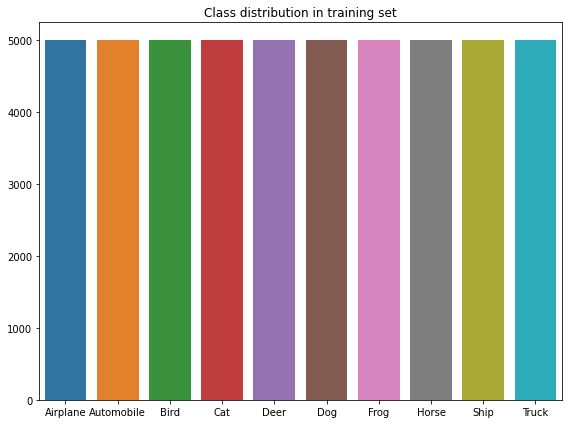

In [17]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
import seaborn as sns 
classes, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(8,6))
sns.barplot(classes_name, counts)
plt.title('Class distribution in training set')
plt.tight_layout()
plt.show()

Distribution for each class in test dataset

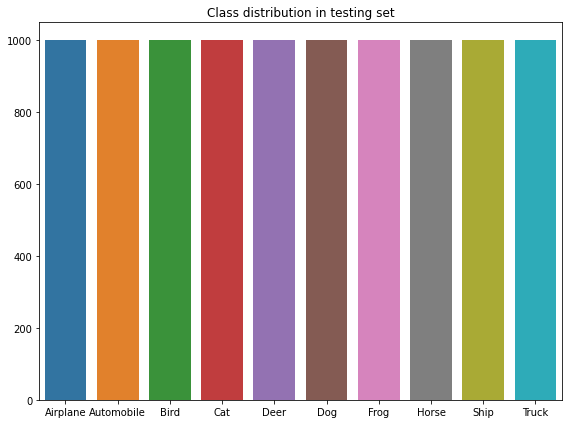

In [18]:

plt.figure(figsize=(8,6))
classes, counts = np.unique(y_test, return_counts=True)
sns.barplot(classes_name,counts)
plt.title('Class distribution in testing set')
plt.tight_layout()
plt.show()

## LeNet Model Training
training the LeNet model with all mentioned above parameters.

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
from tensorflow.keras import layers, models
lenet = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S1
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'), #C2
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='valid'), #C3
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='relu'), #F1
    keras.layers.Dense(10, activation='softmax') #Output layer
])

2022-10-17 18:04:58.741608: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 18:04:58.848317: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 18:04:58.849229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 18:04:58.850597: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [21]:
lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 480)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                4

## LeNet Explaination

First, we create objects of the tf.keras.Sequential class constructor and assign the variable "lenet" to it.
We then go on to specify the levels of our model within the class constructor.
The tf.keras.layers are what we're utilising.

Conv2D class is used to build the network's convolutional layers. A few parameters that we pass are mentioned below.
Activation Function: A computational procedure that produces a normalised output from the result or impulses of neurons. An element of a neural network which adds non-linearity into the network is the activation function. The activation function gives the neural network more representational capacity and the ability to handle challenging problems. With a few different values supplied for the parameters, the other convolutional layers use the same layer specification as C1 as their starting point.

Subsampling layers were used in the original work that established the LeNet-5 architecture. The mean of the pixel values that fell inside the 2x2 pooling window was calculated within the subsampling layer, and the value was then multiplied by a coefficient value. All of this is done prior to the data being sent via activation function, and the final result is then added with a bias.

However, we are using the tf.keras.layers in our constructed LeNet neural network.
Constructor for AveragePooling2D. The constructor does not receive any arguments since it initialises certain default parameters for the needed parameters when it is called. Keep in mind that the feature maps' purpose in the network ought to be down sampled as they travel through the pooling layer.

The network has two additional kinds of layers: flattening layers and dense layers.
The class function Object() { [native code] } tf.keras.layers is used to build the flatten layer.
Flatten.

This layer's function is to convert the input into a 1-dimensional array so that it may be fed into the succeeding dense levels.

The output layer contains 10 units, whereas each of the dense layers—F6 has 84—has a certain quantity of units or neurons.
The 10 units in the final dense layer represent the quantity of classes in the MNIST data. A soft - max function serves as the output layer's activation function.

In order to determine the distribution o probability of a group of integers included into an input vector, the activation function known as Softmax is used. The result of a softmax activation function is a vector whose collection of values indicates the likelihood that a class or event will occur. The vector's values sum up to one when totaled.


In [22]:
lenet.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [23]:
hist = lenet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

2022-10-17 18:05:03.686200: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-10-17 18:05:05.008598: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1563/1563 [==============================] - 13s 4ms/step - loss: 1.6709 - accuracy: 0.3929 - val_loss: 1.4363 - val_accuracy: 0.4786
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3848 - accuracy: 0.5050 - val_loss: 1.3054 - val_accuracy: 0.5301
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2494 - accuracy: 0.5569 - val_loss: 1.2210 - val_accuracy: 0.5678
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1464 - accuracy: 0.5948 - val_loss: 1.1349 - val_accuracy: 0.5988
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0695 - accuracy: 0.6209 - val_loss: 1.1015 - val_accuracy: 0.6133
Epoch 6/100
1563/1563 [==============================] - 5s 4ms/step - loss: 1.0050 - accuracy: 0.6461 - val_loss: 1.0853 - val_accuracy: 0.6192
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9513 - accuracy: 0.6642 - val_loss: 1.0665 - val_accuracy: 0.6

### Results from LeNet  model on CIFAR-10 dataset

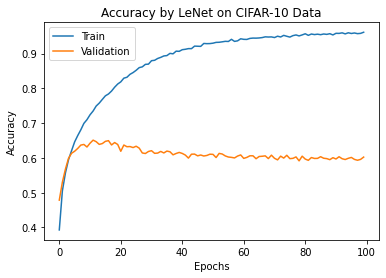

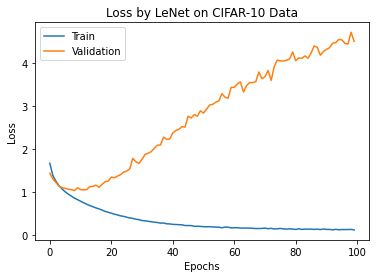

In [24]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

confusion_matrix(y_test, y_predictions)

array([[647,  39,  68,  19,  47,  22,  16,  15,  78,  49],
       [ 34, 728,  17,  14,  17,  11,  10,   7,  40, 122],
       [ 60,  11, 488,  71, 133,  92,  71,  34,  17,  23],
       [ 25,  13, 105, 347,  91, 222,  89,  60,  22,  26],
       [ 28,   8,  91,  70, 564,  65,  70,  72,  14,  18],
       [ 15,   5,  90, 166,  63, 518,  51,  62,  18,  12],
       [ 10,  17,  65,  72,  66,  55, 679,  11,   6,  19],
       [  9,   6,  51,  37, 100,  83,  18, 664,   8,  24],
       [102,  50,  27,  21,  26,  18,   7,   9, 687,  53],
       [ 49, 121,  23,  15,  13,  14,  16,  15,  33, 701]])

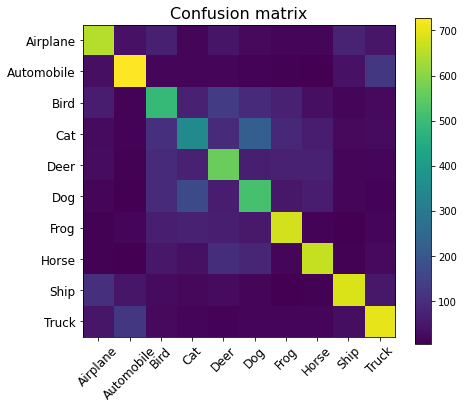

In [26]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.xticks(np.arange(10), classes_name, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes_name, fontsize=12)
plt.colorbar()
plt.show()


In [27]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.6023


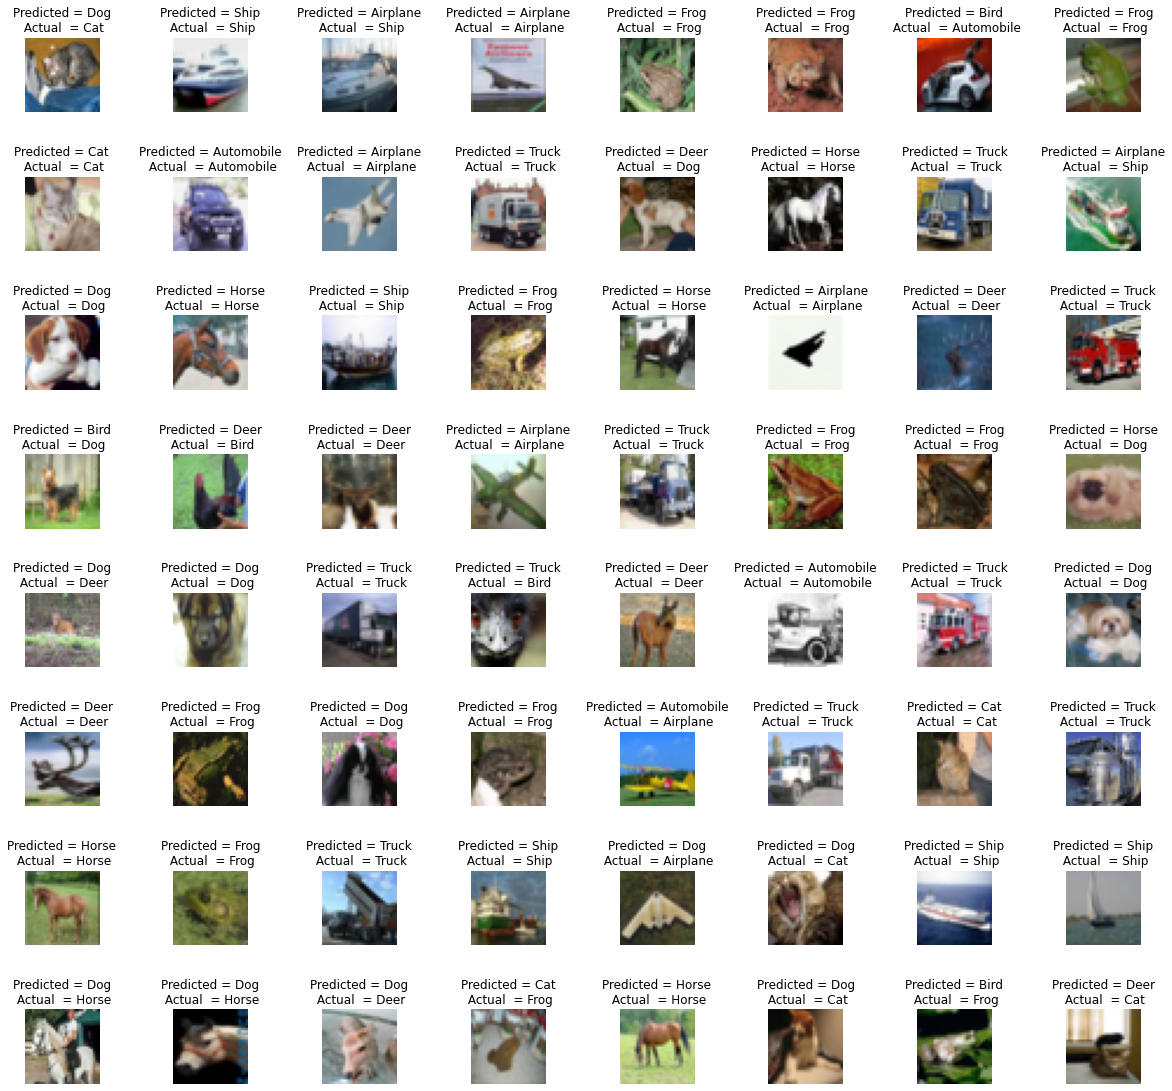

In [28]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes_name[y_predictions[i]], classes_name[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

### Results from LeNet

##### Confusion Matrix:
A matrix that describe a classification model's performance.All diagonal values are denoting true classes and others are wrong predicted classes. So, from the above confusion matrix we can understand that dog and cats classes are misclasified,Deer and Birds classes are misclassified with each other similarlay automobile and trucks are misclassified with each othe mostly. We have a visualization of confusion matrix as well both are describing the model's performance.

##### Test accuracy:
We are comaring the distance between test data and predicted data to calculate accuracy score for model on new data set that is 61% and there is 64% on trainig data from testing and validation graph. This shows that there is no any overfitting or underfitting.

##### Actual and prediced classes visualization:
At last we showed some random actuall and predicted classes sample. Where we can see that results are matched with confusion matrix as well.

## AlexNet Model Explaination

###### AlexNet. 
AlexNet model is known for its parameters that are written below one by one . This model is trained with 8 layers in total in which 5 are convolutional and 3 are fully connected layers 

##### ReLU Nonlinearity.
Instead of tanh , there is Relu function used to produced non-linearties.this is 6  time more fast than tanh function.in terms of error reach on CIFAR-10.

##### Multiple GPUs. 
Another feature that make AlexNet special than other CNN networks is multile gpus ,it allows multiple GPUs to for training.In this way we distribute the computitions and save time as well.  

###### Overlapping Pooling. 
In this model Author used poolimh layers as well that reduced the error and improve the accuracy.

###### Illustration of AlexNet’s architecture.

AlexNet has overfitting problem due to its large number of parameters. To reduce this author took following steps.

##### Data Augmentation. 

To increase the variety of their data, the authors utilised label-preserving manipulation. They specifically created picture translations and horizontal reflections, which boosted the training set by a factor of 2048. They also used Principle Component Analysis (PCA) to adjust the intensities of the RGB channels, which lowered the top-1 mistake rate by more than 1%.

##### Dropout. 
This technique involves "turning off" neurons with a specified frequency (e.g. 50 percent ). Because each cycle employs a random technique of the model's parameters, each neuron is forced to get more durable characteristics that can be applied to random neurons. Dropout, though, lengthens the amount of time required for training until the model converges.

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

### Defining AlexNet Model with Parameters mentioned above. 

In [30]:
#Define Alexnet Model
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16,kernel_size=(3,3),strides=(4,4),input_shape=(32,32,3), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(5,5),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(30,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(20,(3,3),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Flatten())
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(10,activation='softmax'))

AlexNet.compile(optimizer='SGD', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 8, 8, 16)          448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 60)          24060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 60)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 60)          32460     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 30)          16230     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 20)         

### Explaination Of AlexNet
###### First input Layer:
A 32*32 RGB picture serves as the input for AlexNet. This indicates that all of the training set's and test set's photos are 32*32 pixels in size. If the input picture is not 32*32, it is rescaled so that the shorter size is 32 and the middle 32*32 patch is cropped out of the final image.
With the raw RGB pixel intensity, the picture is trained. As a result, a grayscale input picture is transformed to an RGB picture. Through random cropping, pictures of size 33*33 were created from photos of size 32*32, and these were fed into AlexNet's first layer.

###### Convolutional Layers:
A convoloutional layer covolves the image and creates an activation map for next layer. we can calculate the output of convoloutional layer with following formula:
###### output= ((Input-filter size)/ stride)+1
There are five convoloutional layers in AlexNet model. For each layer same padding and Rectified linear unit(ReLu) is used to produce non-linearties in it. while the kernal size and stride is different for each which depends on image size.
1st,2nd and 3rd convolutional layers are followed by Maxpooling layers while other are directely connected with each other.

##### Max Pooling Layers:
A pooling procedure known as maximum pooling, sometimes known as max pooling, determines the maximum or greatest values for each region of each feature map.
In AlexNe there are 3 Max Pooling layers that are connected with Convoloutional layers.As mentioned above.

##### Flatten Layer:
A flatten layer is used to reduce each layer of a multi-layered picture to a single plane.
after convolutional and mapooling layers flatten layer is used to reduce dimensions of images in single tensor.

###### Dense Layers:
The dense layer is the typical layer of a neural network with many connections. It is the most typical and often utilized layer. Dense layer generates an output below on the input and then returns the result.
###### output = activation(dot(input, kernel) + bias)

##### Dropout Layers:
In order to avoid overfitting, the Dropout layer randomised sets of input units to 0 with a frequency of rate at each step during training. The sum of all inputs is maintained by scaling up non-zero inputs by 1/(1 - rate).
The learnig rate is set as 0.1.

In last dense layer softmax activation function is used when there are more than two classes to predict as in our data set we have 10 classes.



### Training AlexNet model 

In [31]:
history1 = AlexNet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3003 - accuracy: 0.1215 - val_loss: 2.2952 - val_accuracy: 0.1708
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 2.2442 - accuracy: 0.1594 - val_loss: 2.1037 - val_accuracy: 0.2004
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0651 - accuracy: 0.2010 - val_loss: 2.0380 - val_accuracy: 0.2048
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9649 - accuracy: 0.2370 - val_loss: 1.8431 - val_accuracy: 0.2944
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8182 - accuracy: 0.2981 - val_loss: 1.7485 - val_accuracy: 0.3377
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7358 - accuracy: 0.3403 - val_loss: 1.6621 - val_accuracy: 0.3810
Epoch 7/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6669 - accuracy: 0.3707 - val_loss: 1.6103 - val_ac

### Results by AlexNet


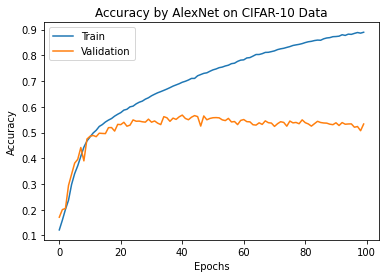

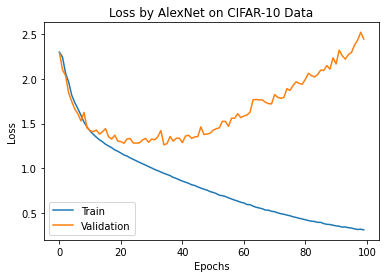

In [32]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Accuracy by AlexNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss by AlexNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

### Confusion Matrix

In [33]:
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)

confusion_matrix(y_test, y_predictions1)

array([[531,  25,  91,  52,  36,  11,  20,  36, 128,  70],
       [ 35, 523,  11,  26,  10,  10,  13,  35,  76, 261],
       [ 58,   6, 432,  86, 128,  98,  62,  83,  21,  26],
       [ 19,  11,  76, 346,  63, 304,  81,  61,  10,  29],
       [ 31,   6, 118,  57, 466,  85,  83, 129,  10,  15],
       [ 13,   7,  76, 168,  68, 518,  25, 102,   4,  19],
       [  5,  17,  63, 126, 106,  61, 572,  21,   7,  22],
       [ 23,  12,  47,  47,  83, 114,  17, 599,   5,  53],
       [ 75,  47,  19,  43,  22,  16,   7,   9, 685,  77],
       [ 44,  94,  13,  50,   5,  18,  22,  39,  57, 658]])

### Cnfusion Matrix Plot

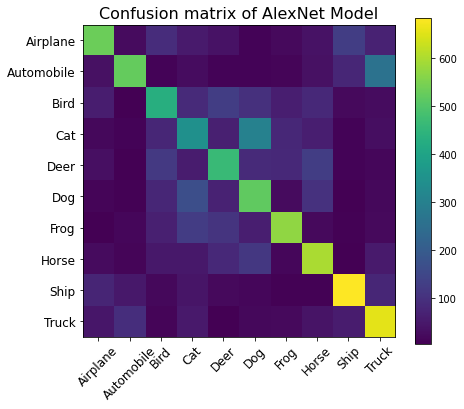

In [34]:
# confusion matrix and accuracy
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of AlexNet Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
plt.xticks(np.arange(10), classes_name, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes_name, fontsize=12)
plt.colorbar()
plt.show()


### Accuracy score on Test Data set

In [35]:
print("Test accuracy by AlexNet:", accuracy_score(y_test, y_predictions))

Test accuracy by AlexNet: 0.6023


# Conclusion

In this notebook we performed comparision of two famous CNN algorithims LeNet and AlexNet on CIFAR_10 Dataset.
Both models are trained on cifar10 dataset.In cifar10 there are 10 classes and we performed a classification with the mentioned above models. LeNet has very less number of paramerters and layers as compared to AlexNet model.However AlexNet is much deeper network than LeNet. But on CIFAR-10 data as we can see in results section AlexNet is not performed out the box in comparision of LeNet.If we look at the Accuracy score of LeNet on test data that is 60.24% while with ALexNet we got same accuracy with AlexNet.But we can improve it using different parameters. However it is noted that AlexNet was trained and developed for a very large dataset like ImageNet dataset, and cifar10 is smaller data that is why AlexNet is facing overfitting similary LeNet is also facing overfitting. 